In [1]:
# Importieren der benötigten Bibliotheken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install scikit-learn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
# Laden des MNIST-Datensatzes
mnist = fetch_openml("mnist_784", version=1)

# Reduzierung des Datensatzes auf eine kleinere Teilmenge (z. B. 10.000 Beispiele)
subset_size = 10000
X, y = mnist.data[:subset_size], mnist.target[:subset_size]

/Users/celinebeck/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Aufteilung der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

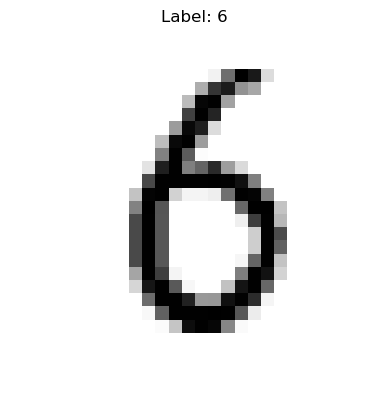

In [4]:
# EDA: Anzeigen einer Beispiel-Ziffer
sample_digit = X_train.iloc[0].to_numpy().reshape(28, 28)
plt.imshow(sample_digit, cmap="binary")
plt.axis("off")
plt.title(f"Label: {y_train.iloc[0]}")
plt.show()

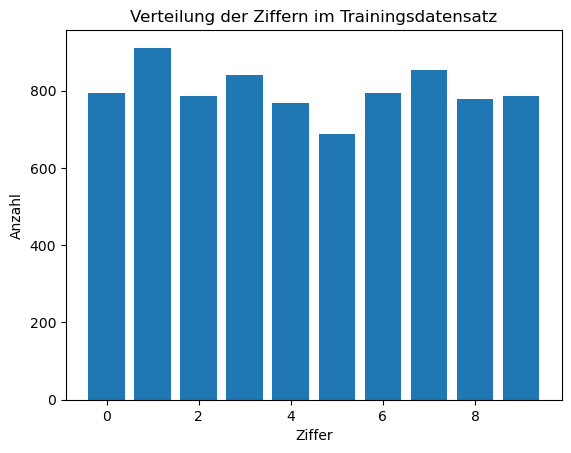

In [5]:
# EDA: Verteilung der Ziffern im Datensatz
digit_counts = y_train.value_counts().sort_index()
plt.bar(digit_counts.index.astype(int), digit_counts.values)
plt.xlabel("Ziffer")
plt.ylabel("Anzahl")
plt.title("Verteilung der Ziffern im Trainingsdatensatz")
plt.show()

In [6]:
# Datenbereinigung und Vorbereitung
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Ergebnisse anzeigen
print("Trainingsdaten:", X_train_scaled.shape)
print("Testdaten:", X_test_scaled.shape)

Trainingsdaten: (8000, 784)
Testdaten: (2000, 784)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def train_and_evaluate_knn(X_train, y_train, X_test, y_test, k=3):
    # Trainieren des k-NN Klassifikators
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)

    # Vorhersagen auf den Testdaten
    y_pred = knn_classifier.predict(X_test)

    # Berechnung der Genauigkeit
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [9]:
# Aufruf der Funktion
k = 5  # Anzahl der Nachbarn im k-NN Algorithmus
accuracy = train_and_evaluate_knn(X_train_scaled, y_train, X_test_scaled, y_test, k)
print(f"Genauigkeit des k-NN-Modells mit k={k}: {accuracy:.2f}")

Genauigkeit des k-NN-Modells mit k=5: 0.91


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
import logging

In [11]:
# Implementierung von my_logger und my_timer
def my_logger(log_message):
    logging.info(log_message)

def my_timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        my_logger(f"{func.__name__} executed in {execution_time:.4f} seconds")
        return result
    return wrapper

In [12]:
# Beispiel-Funktion zur Klassifikation
@my_timer
def train_and_evaluate_knn(X_train, y_train, X_test, y_test, k=3):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [13]:
if __name__ == '__main__':

    # Aufrufen der train_and_evaluate_knn-Funktion
    k = 5  # Wählen Sie die Anzahl der Nachbarn
    accuracy = train_and_evaluate_knn(X_train, y_train, X_test, y_test, k)

    # Ausgabe der Genauigkeit
    print(f"Genauigkeit des k-NN-Modells: {accuracy}")

Genauigkeit des k-NN-Modells: 0.9475


In [18]:
import unittest
import logging
from sklearn.metrics import confusion_matrix

class TestKNNClassifier(unittest.TestCase):

    def setUp(self):
        self.k = 5
        self.knn_classifier = KNeighborsClassifier(n_neighbors=self.k)
        self.knn_classifier.fit(X_train_scaled, y_train)
        self.test_data = X_test_scaled[:100]  # Beispiel: Verwenden Sie die ersten 100 Testdaten

    def test_predict_accuracy(self):
        y_pred = self.knn_classifier.predict(self.test_data)
        accuracy = accuracy_score(y_test[:100], y_pred)
        self.assertTrue(accuracy > 0.9)  # Beispielprüfung für Genauigkeit
        
        # Speichern der Testdaten in einer CSV-Datei
        test_data_df = pd.DataFrame(self.test_data)
        test_data_df.to_csv('test_data.csv', index=False)
        
        confusion = confusion_matrix(y_test[:100], y_pred)
             
        # Ausgabe der Genauigkeit und der Verwirrungsmatrix
        print(f"Accuracy: {accuracy}")
        print("Confusion Matrix:")
        print(confusion)
        
        self.assertTrue(confusion[0, 0] > 10)
    
    def test_train_and_evaluate_knn(self):
        accuracy = train_and_evaluate_knn(X_train_scaled, y_train, X_test_scaled, y_test, self.k)
        
        # Ausgabe der Genauigkeit
        print(f"Genauigkeit: {accuracy}")
        
        self.assertTrue(accuracy > 0.9)  # Beispielprüfung für Genauigkeit
        
    @my_timer
    def test_fit_runtime(self):
        start_time = time.time()
        knn_classifier = KNeighborsClassifier(n_neighbors=self.k)
        knn_classifier.fit(X_train_scaled, y_train)
        end_time = time.time()
        elapsed_time = end_time - start_time
        
        # Annahme einer repräsentativen Laufzeit (z. B. 100 Sekunden)
        representative_runtime = 2
        
        ratio = elapsed_time / representative_runtime
        
        # Sicherstellen, dass der Grenzwert nicht überschritten wird (z.B. 120%)
        max_ratio = 1.2  
        
        # Ausgabe der Ergebnisse
        print(f"Laufzeit: {elapsed_time} Sekunden")
        print(f"Vergleich mit repräsentativer Laufzeit: {ratio:.2f}")
        
        if ratio <= max_ratio:
            print("Laufzeit liegt im akzeptablen Bereich.")
        else:
            print("Laufzeit überschreitet den akzeptablen Bereich.")
            self.fail("Laufzeit überschreitet den akzeptablen Bereich.")

# Konfiguration des Loggings
logging.basicConfig(filename='example.log', level=logging.INFO)

# Laden der Testsuite
suite = unittest.TestLoader().loadTestsFromTestCase(TestKNNClassifier)

# Ausführen der Testsuite
unittest.TextTestRunner(verbosity=3).run(suite)

test_fit_runtime (__main__.TestKNNClassifier) ... ok
test_predict_accuracy (__main__.TestKNNClassifier) ... ok
test_train_and_evaluate_knn (__main__.TestKNNClassifier) ... 

Laufzeit: 0.01789689064025879 Sekunden
Vergleich mit repräsentativer Laufzeit: 0.01
Laufzeit liegt im akzeptablen Bereich.
Accuracy: 0.92
Confusion Matrix:
[[12  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  2  0]
 [ 0  0  0  0  0  0  9  0  0  0]
 [ 0  1  0  0  1  0  0  6  0  0]
 [ 0  0  0  2  1  0  0  0 11  0]
 [ 0  1  0  0  0  0  0  0  0  9]]


ok

----------------------------------------------------------------------
Ran 3 tests in 0.584s

OK


Genauigkeit: 0.912


<unittest.runner.TextTestResult run=3 errors=0 failures=0>